In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from src.metricas import calculate_wcss, optimal_number_of_clusters


In [39]:
#Realizar a implementação do K-means e Hierárquico na base de dados do Glass. A partir dos grupos encontrados, verificar os indivíduos dos grupos quanto a classe e apontar aquele método que consegue encontrar grupos mais uniformes (indivíduos da mesma classe). Utilizar técnicas Elbow para encontrar o número de K do k-means. Enviar relatório com as discussões a respeito dos resultados.

In [74]:
#Carregando o dataset e incluindo o nome das variáveis
column_names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df = pd.read_csv("https://raw.githubusercontent.com/irvin-s/in-1166-smd/main/missao_7/glass.data", names=column_names)

In [75]:
#Verificando o tamanho do dataset
df.shape
df.head

<bound method NDFrame.head of       Id       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 11 columns]>

In [42]:
#Este dataset possui uma coluna chamada Id como identificação de de cada registro e outra coluna chamada Type, que é a variável resposta.
#analisando a classe reposta é possível identificar a quantidade de grupos existentes, para este exercício será removido a coluna Id.

In [76]:
#Removendo as colunas Id
df = df.drop(columns=["Id"])
df.head

<bound method NDFrame.head of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

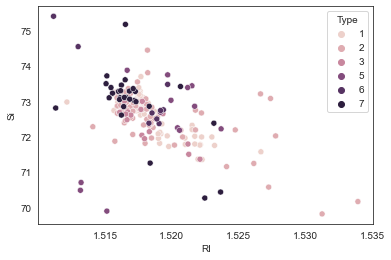

In [57]:
#Gráfico de dispersãode acordo com o índice de refração
sns.scatterplot(x=df.RI, y=df.Si, hue=df.Type)
plt.show()

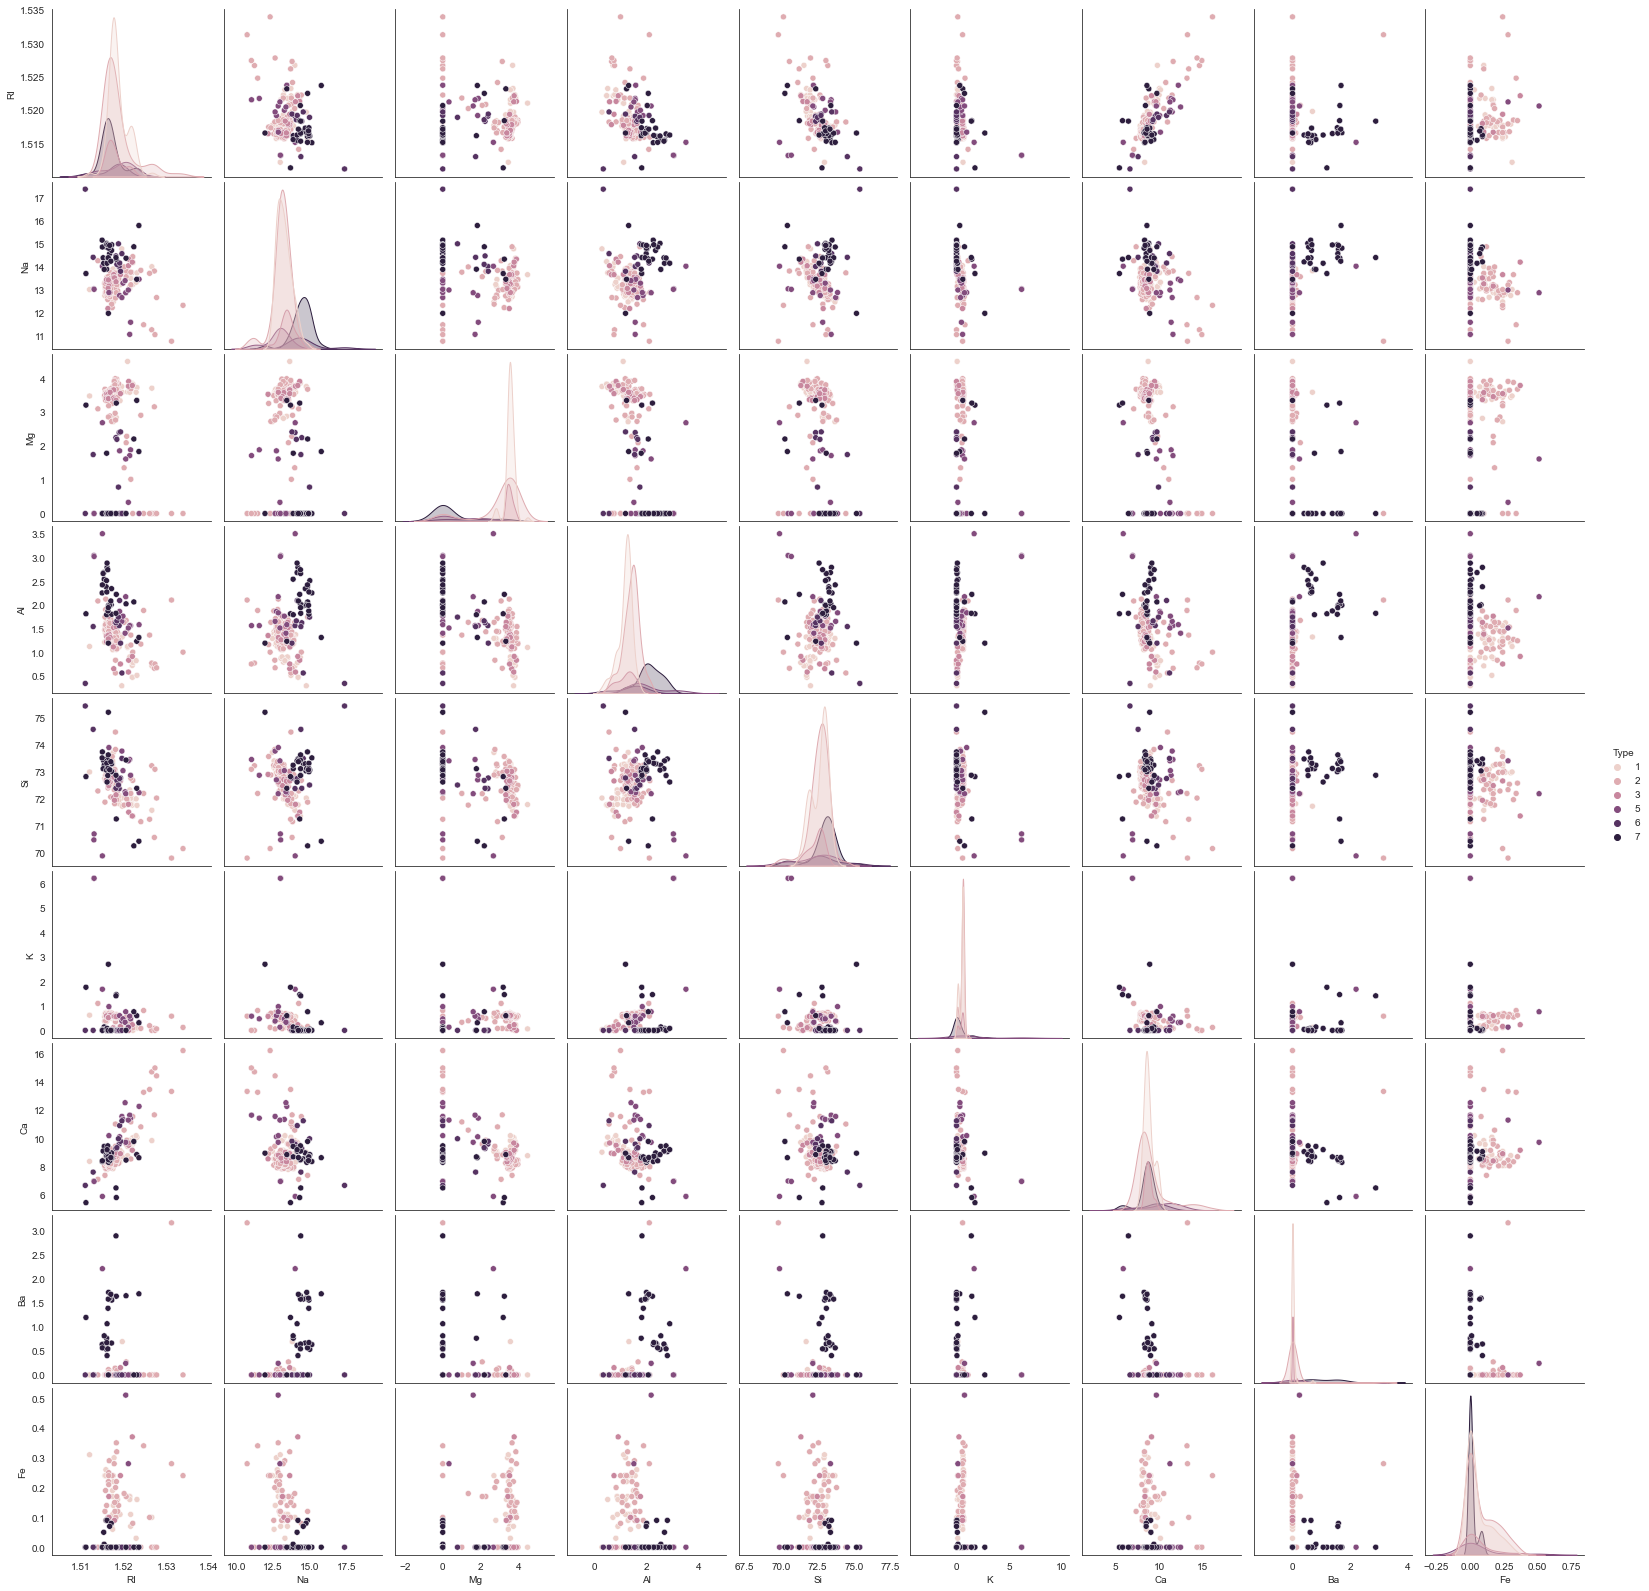

In [45]:
#Matriz com os dados
sns.pairplot(df, hue="Type")
plt.show()

In [77]:
#Encontrando o valor de K com a técninca de Elbows
df=df.drop(columns=["Type"])
sum_of_squares = calculate_wcss(df)
n = optimal_number_of_clusters(sum_of_squares)

In [96]:
#Cluster com o K-MEANS
kmeans = KMeans(n_clusters=n)

#Predizendo os clusters encontrados
df['clusters'] = kmeans.fit_predict(df)

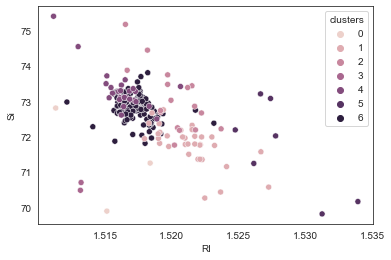

In [101]:

sns.scatterplot(x=df.RI, y=df.Si, hue=df.clusters)
plt.show()

In [49]:
#Cluster Hierárquico